In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
from scipy import stats
import seaborn as sns
%matplotlib inline

In [4]:
from pyodide.http import pyfetch

In [5]:
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [7]:
await download (file_path, 'laptop.csv')

In [8]:
file_name = 'laptop.csv'

In [11]:
df = pd.read_csv(file_name, header=0)

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Task 1 - Visualize individual feature patterns
Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

(0.0, 3974.15)

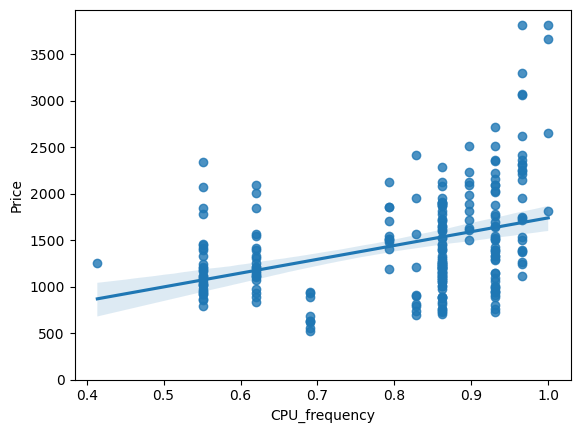

In [14]:
sns.regplot(x= 'CPU_frequency', y = 'Price', data = df)
plt.ylim(0,)

(0.0, 3974.15)

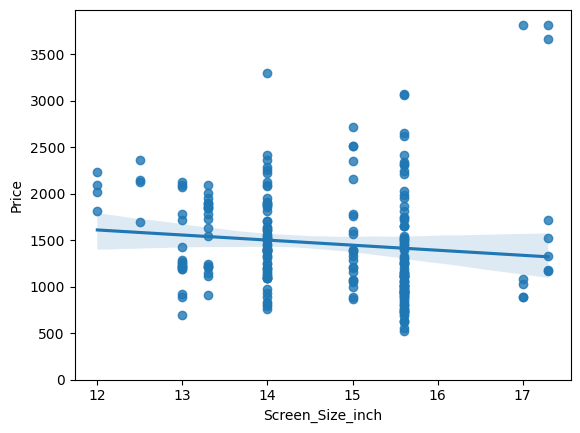

In [15]:
sns.regplot(x= 'Screen_Size_inch', y = 'Price', data = df)
plt.ylim(0,)

(0.0, 3974.15)

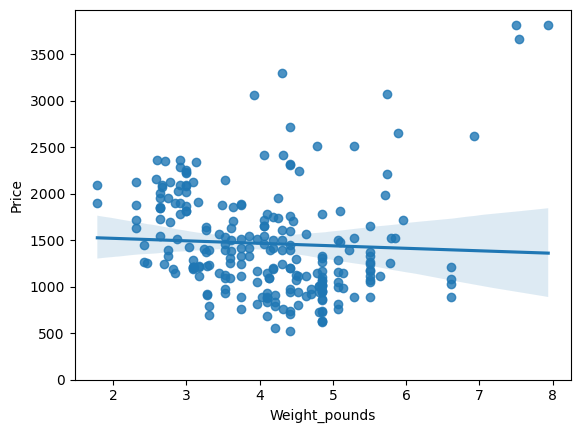

In [16]:
sns.regplot(x= 'Weight_pounds', y = 'Price', data = df)
plt.ylim(0,)

Conclusion: Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<AxesSubplot:xlabel='Category', ylabel='Price'>

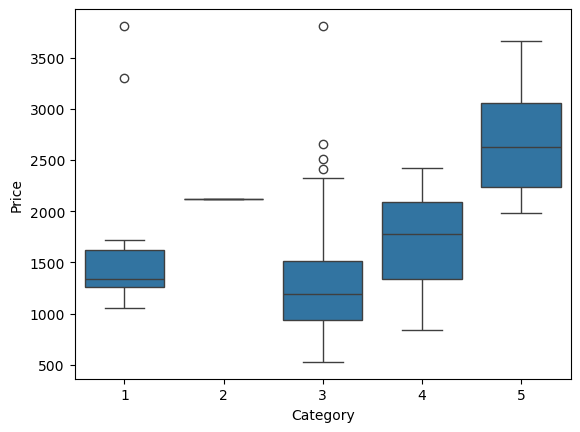

In [19]:
sns.boxplot(x= 'Category', y = 'Price', data = df)

<AxesSubplot:xlabel='GPU', ylabel='Price'>

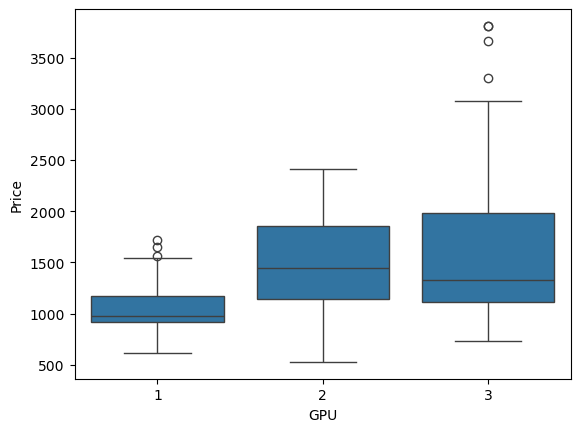

In [20]:
sns.boxplot(x= 'GPU', y = 'Price', data = df)

<AxesSubplot:xlabel='OS', ylabel='Price'>

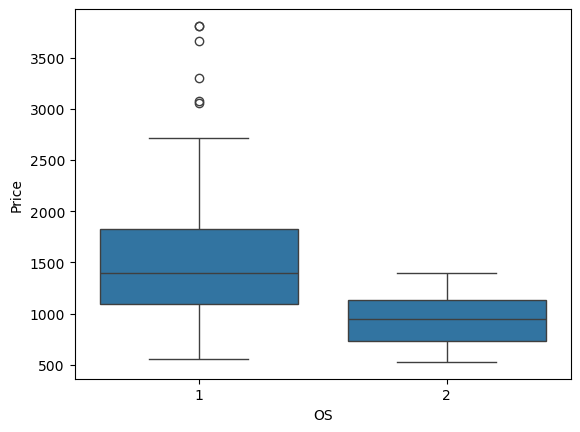

In [21]:
sns.boxplot(x= 'OS', y = 'Price', data = df)

<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

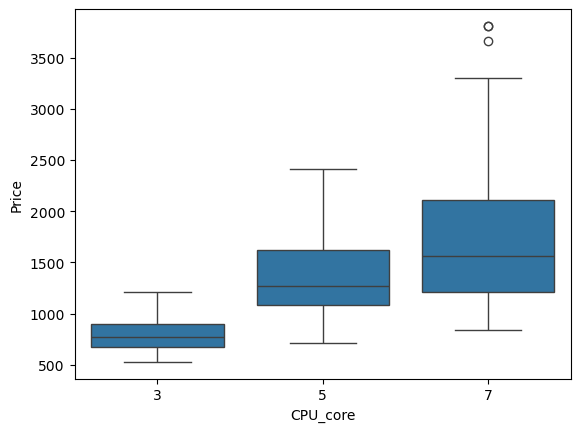

In [22]:
sns.boxplot(x= 'CPU_core', y = 'Price', data = df)

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

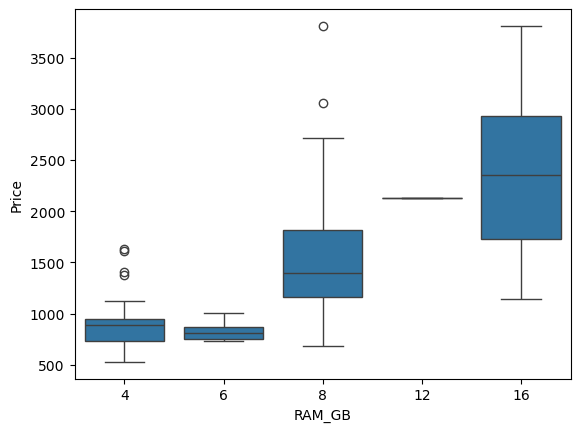

In [23]:
sns.boxplot(x= 'RAM_GB', y = 'Price', data = df)

<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

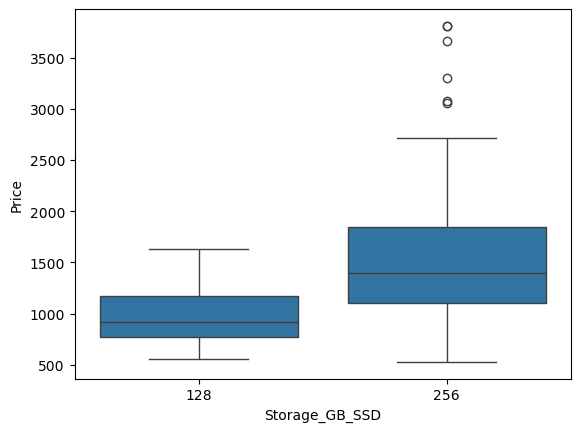

In [24]:
sns.boxplot(x= 'Storage_GB_SSD', y = 'Price', data = df)

### Task 2 - Descriptive Statistical Analysis¶
Generate the statistical description of all the features being used in the data set. Include "object" data types as well.

In [26]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [25]:
df.describe(include = ['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


### Task 3 - GroupBy and Pivot Tables
Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.

In [28]:
gp_GPU = df[["GPU", "CPU_core", "Price"]]

In [30]:
df_grouped = gp_GPU.groupby(["GPU", "CPU_core"], as_index= False).mean()
df_grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [33]:
grouped_pivot = df_grouped.pivot(index = 'GPU', columns = 'CPU_core')
grouped_pivot 

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

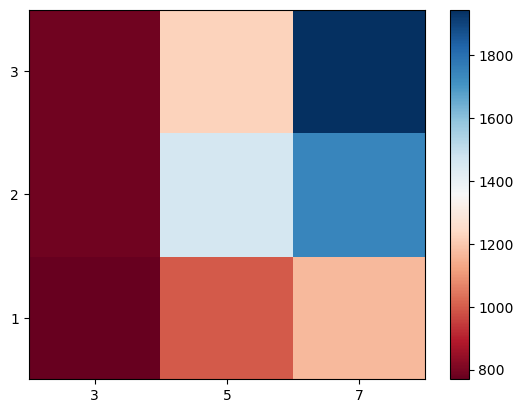

In [34]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

## Task 4 - Pearson Correlation and p-values¶
Use the scipy.stats.pearsonr() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.
'RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category' against 'Price'

In [41]:
pearson_coef, p_value = stats.pearsonr(df['RAM_GB'], df['Price'])
print(pearson_coef, p_value)

0.5492972971857849 3.6815606288424503e-20


CONCLUSION: since the p-value is less than 0.001, the correlation between horsepower and price is statistically significant, the coefficient of about 0.549 shows that the relationship is positive and moderately strong.

In [44]:
pearson_coef, p_value = stats.pearsonr(df['CPU_frequency'], df['Price'])
print('The Pearson Coef Correlation is', pearson_coef, 'with P-value of P =', p_value)

The Pearson Coef Correlation is 0.3666655589258861 with P-value of P = 5.50246335071342e-09


CONCLUSION: since the p-value is less than 0.001, the correlation between horsepower and price is statistically significant, the coefficient of about 0.366 shows that the relationship is positive and moderately strong

In [45]:
pearson_coef, p_value = stats.pearsonr(df['Storage_GB_SSD'], df['Price'])
print('The Pearson Coef Correlation is', pearson_coef, 'with P-value of P =', p_value)

The Pearson Coef Correlation is 0.24342075521810297 with P-value of P = 0.00014898923191724168


CONCLUSION: since the p-value is more than 0.001, there moderate evidence that the correlation between horsepower and price is statistically significant, the coefficient of about 0.243 shows that the relationship is positive and moderately strong